✅ Dataset Loaded Successfully

Shape of Dataset: (418, 12)

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB

🔍 Summary Statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Peter, Master. Michael J",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN



🚫 Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


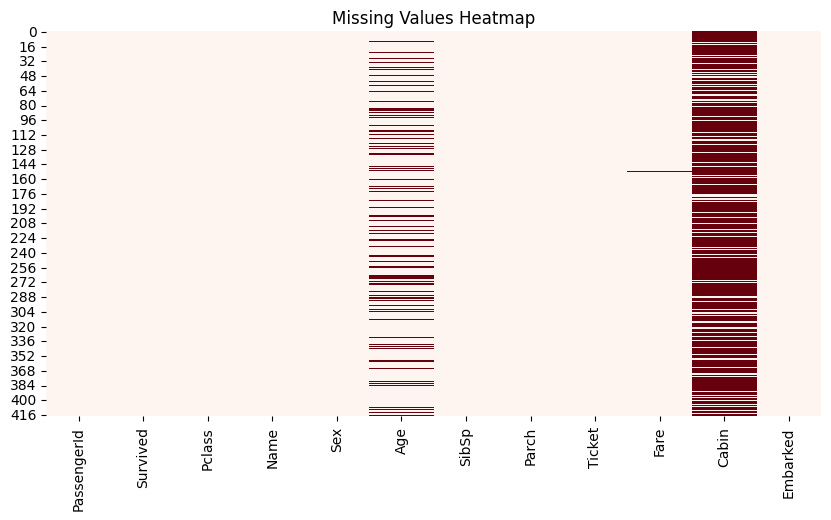


✅ Missing Values handled successfully.
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

🔁 Number of Duplicate Rows: 0
No Duplicates found.


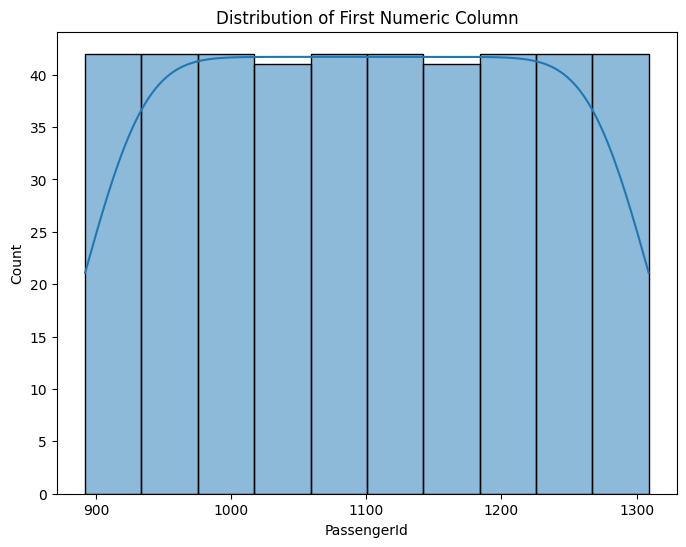

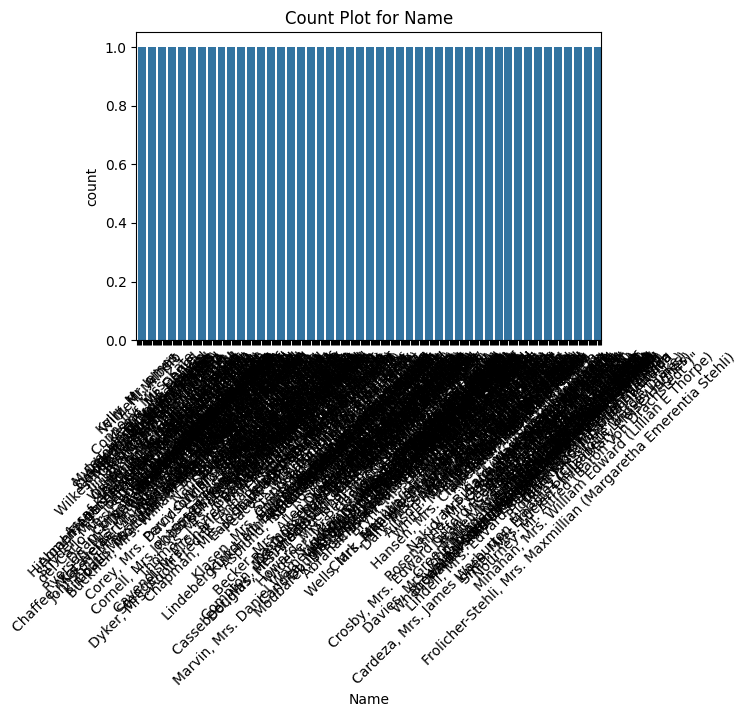

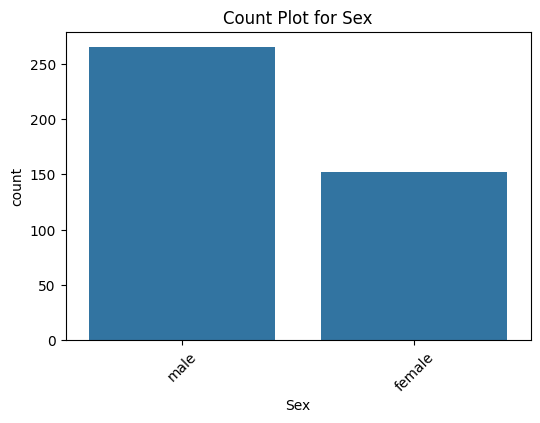

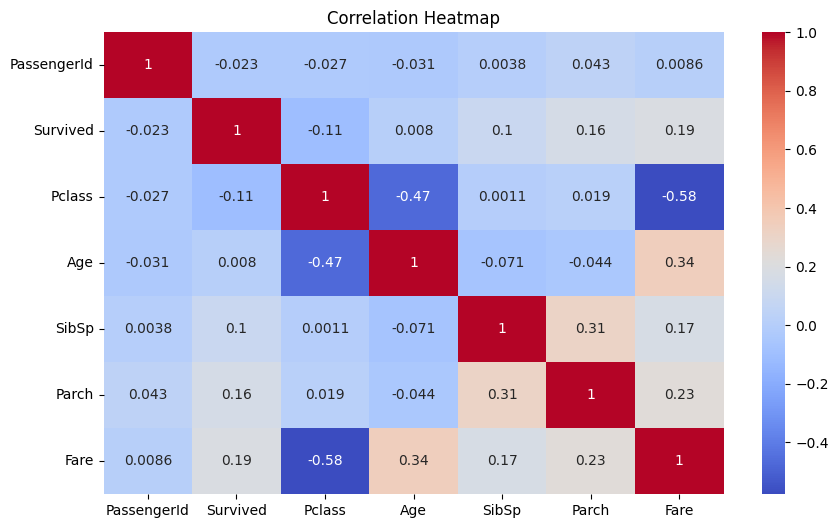

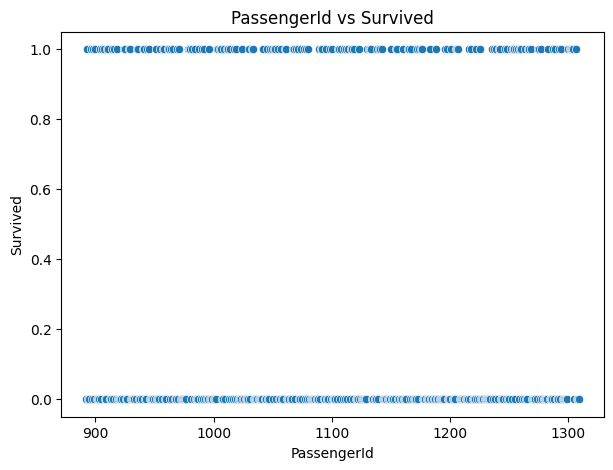

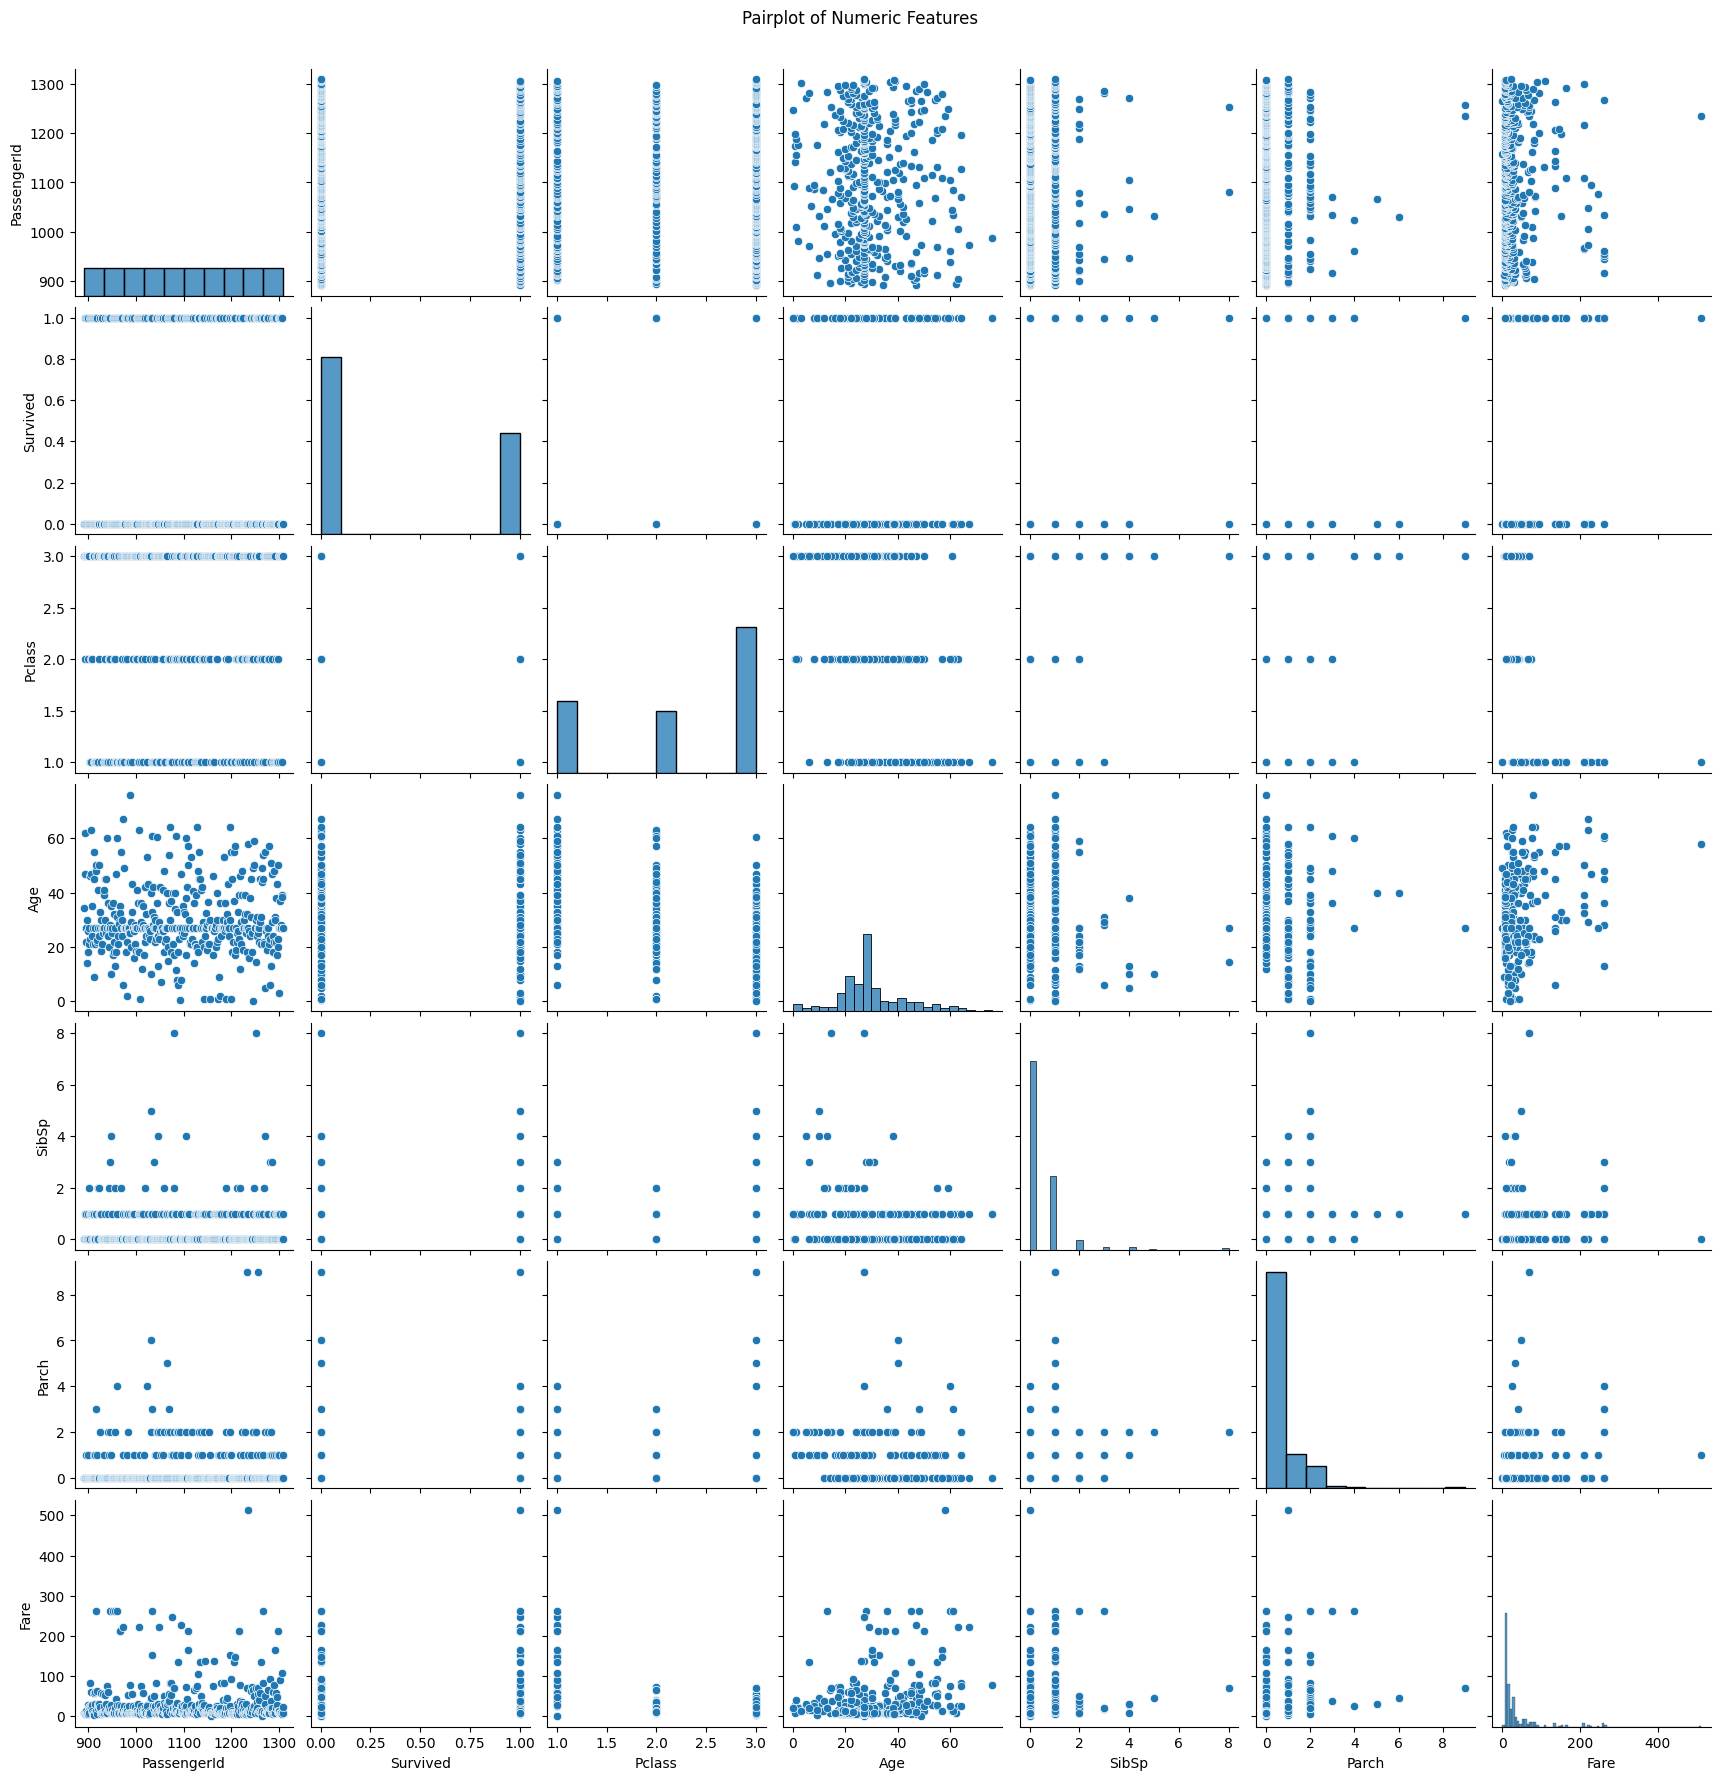


📈 Insights and Observations:

1. The dataset contains 418 rows and 12 columns.
2. Missing values were handled by filling numeric columns with median and categorical with mode.
3. Duplicates (if any) were removed.
4. Key numerical columns show distinct distributions; check histograms for skewness.
5. Correlation heatmap highlights relationships between numerical features.
6. Categorical features were visualized using count plots.
7. Further insights can be drawn based on domain understanding of columns.



In [1]:
# ===============================================
# 🧩 Prodigy Infotech - Task 02
# Data Cleaning and Exploratory Data Analysis (EDA)
# ===============================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load Dataset
# Replace the path if running locally
df = pd.read_csv("tested.csv")
print("✅ Dataset Loaded Successfully\n")
print("Shape of Dataset:", df.shape)
df.head()

# Step 3: Basic Information about Dataset
print("\n📊 Dataset Information:")
df.info()

print("\n🔍 Summary Statistics:")
display(df.describe(include='all'))

# Step 4: Check Missing Values
print("\n🚫 Missing Values per Column:")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()

# Step 5: Handle Missing Values
# Fill numeric columns with median, categorical with mode
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

print("\n✅ Missing Values handled successfully.")
print(df.isnull().sum())

# Step 6: Check for Duplicates
duplicates = df.duplicated().sum()
print(f"\n🔁 Number of Duplicate Rows: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("✅ Duplicates removed.")
else:
    print("No Duplicates found.")

# Step 7: Univariate Analysis
plt.figure(figsize=(8,6))
sns.histplot(df.select_dtypes(include=[np.number]).iloc[:,0], kde=True)
plt.title("Distribution of First Numeric Column")
plt.show()

for col in df.select_dtypes(include='object').columns[:2]:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.show()

# Step 8: Correlation and Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 9: Bivariate Analysis
# Try comparing any two meaningful columns from your dataset
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=num_cols[0], y=num_cols[1], data=df)
    plt.title(f"{num_cols[0]} vs {num_cols[1]}")
    plt.show()

# Step 10: Pairplot (for overall visualization)
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

# Step 11: Insights Summary
print("\n📈 Insights and Observations:")
print("""
1. The dataset contains {} rows and {} columns.
2. Missing values were handled by filling numeric columns with median and categorical with mode.
3. Duplicates (if any) were removed.
4. Key numerical columns show distinct distributions; check histograms for skewness.
5. Correlation heatmap highlights relationships between numerical features.
6. Categorical features were visualized using count plots.
7. Further insights can be drawn based on domain understanding of columns.
""".format(df.shape[0], df.shape[1]))